In [2]:
# No extra installs needed unless using XGBoost or CatBoost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")



In [4]:
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['vehicle_data.csv']))  # Replace with actual filename
df.head()


Saving vehicle_data.csv to vehicle_data.csv


,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [5]:
df.columns

Index(['name', 'description', 'make', 'model', 'year', 'price', 'engine',
       'cylinders', 'fuel', 'mileage', 'transmission', 'trim', 'body', 'doors',
       'exterior_color', 'interior_color', 'drivetrain'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

In [11]:
df["make"].value_counts()

,count
make,
Jeep,194
Hyundai,121
Dodge,117
Ford,88
RAM,79
Kia,52
Chevrolet,49
Nissan,40
Mazda,38


In [12]:
df["year"].value_counts()

,count
year,
2024,906
2023,90
2025,6


In [13]:
df["cylinders"].value_counts()

,count
cylinders,
4.0,502
6.0,277
8.0,89
3.0,27
0.0,2


In [14]:
df["fuel"].value_counts()

,count
fuel,
Gasoline,664
Hybrid,137
Electric,99
Diesel,73
PHEV Hybrid Fuel,16
E85 Flex Fuel,5
Diesel (B20 capable),1


In [17]:
df["transmission"].value_counts()

,count
transmission,
8-Speed Automatic,325
Automatic,236
6-Speed Automatic,98
1-Speed Automatic,69
9-Speed Automatic,62
10-Speed Automatic,58
Automatic CVT,45
8-Speed Automatic with Auto-Shift,17
7-Speed DSGA? Automatic w/ 4MO,11


In [18]:
df["body"].value_counts()

,count
body,
SUV,704
Pickup Truck,154
Sedan,80
Cargo Van,36
Passenger Van,13
Hatchback,10
Convertible,1
Minivan,1


In [19]:
df["drivetrain"].value_counts()

,count
drivetrain,
All-wheel Drive,461
Four-wheel Drive,328
Front-wheel Drive,138
Rear-wheel Drive,75


In [43]:
print("Info:")
print(df.info())
print(

)
print("Describe:")
print(df.describe())

print(

)

print("Sum of Null values in each columns")
print(df.isnull().sum())




Info:
<class 'pandas.core.frame.DataFrame'>
Index: 791 entries, 0 to 1001
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   make            791 non-null    int64  
 1   model           791 non-null    int64  
 2   year            791 non-null    int64  
 3   price           791 non-null    float64
 4   cylinders       791 non-null    float64
 5   fuel            791 non-null    int64  
 6   mileage         791 non-null    float64
 7   transmission    791 non-null    int64  
 8   trim            791 non-null    int64  
 9   body            791 non-null    int64  
 10  doors           791 non-null    float64
 11  exterior_color  791 non-null    int64  
 12  interior_color  791 non-null    int64  
 13  drivetrain      791 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 92.7 KB
None

Describe:
             make       model         year          price   cylinders  \
count  791.000000  791.000000   

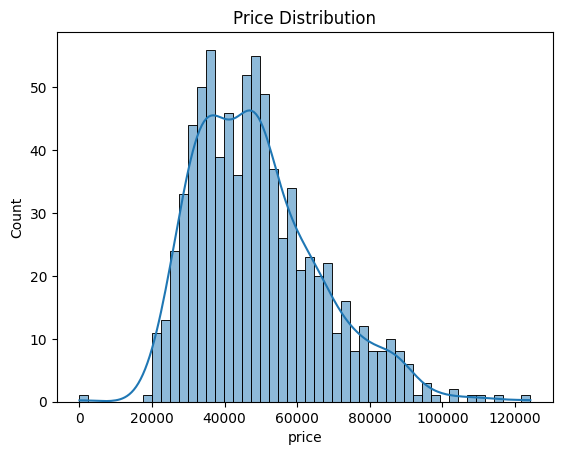

In [40]:

# Visuals
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()

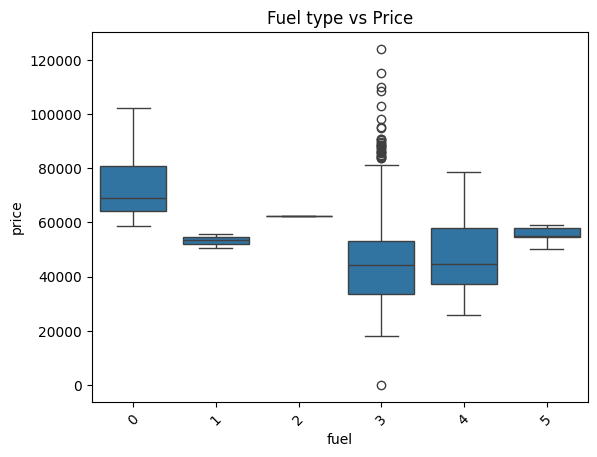

In [42]:
sns.boxplot(x=df['fuel'], y=df['price'])
plt.xticks(rotation=45)
plt.title("Fuel type vs Price")
plt.show()

In [21]:

df.dropna(subset=['price', 'description','cylinders', 'model', 'year','interior_color'], inplace=True)
df.fillna(method='ffill', inplace=True)

print("Remaining null values:\n", df.isnull().sum())


Remaining null values:
 name              0
description       0
make              0
model             0
year              0
price             0
engine            0
cylinders         0
fuel              0
mileage           0
transmission      0
trim              0
body              0
doors             0
exterior_color    0
interior_color    0
drivetrain        0
dtype: int64


In [22]:
df.drop(['name', 'description', 'engine'], axis=1, inplace=True)
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

df.head()


,make,model,year,price,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,12,115,2024,74600.0,6.0,3,10.0,15,131,6,4.0,221,31,1
1,12,46,2024,50170.0,6.0,3,1.0,15,74,6,4.0,125,31,1
3,6,27,2023,46835.0,8.0,3,32.0,15,95,6,4.0,223,5,0
4,20,2,2024,81663.0,6.0,0,10.0,7,71,5,4.0,182,5,1
5,19,60,2024,46000.0,6.0,3,3838.0,29,88,6,4.0,221,33,0


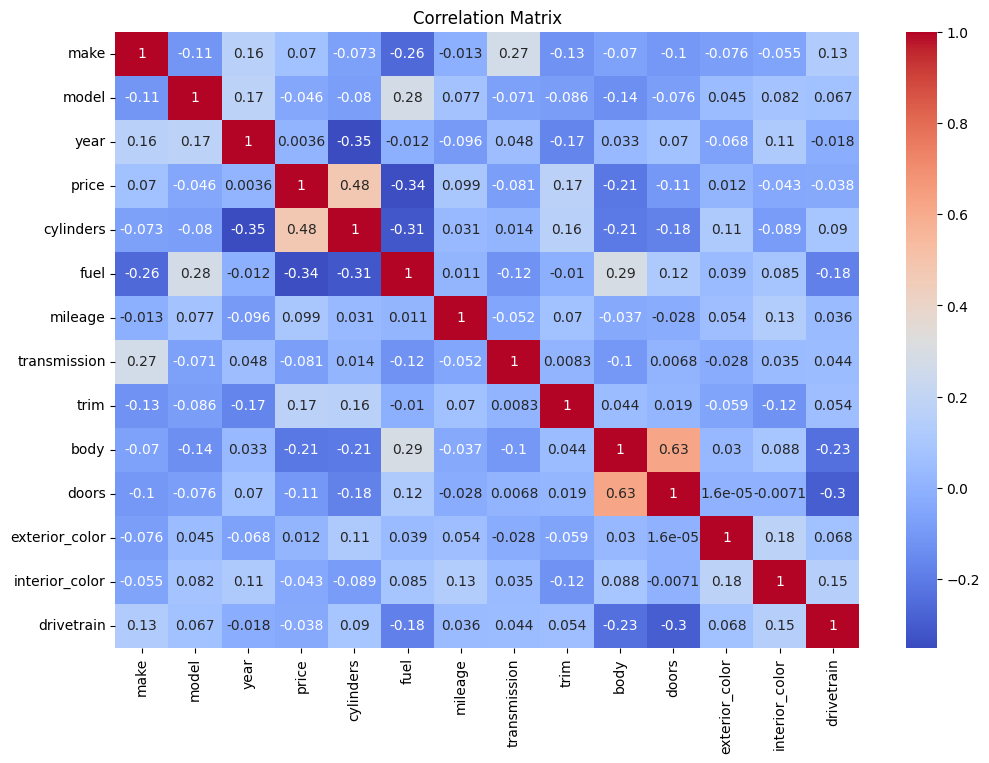

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()




In [24]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
X_train

,make,model,year,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
217,12,118,2024,4.0,4,1.0,15,134,6,4.0,43,5,1
168,19,113,2024,4.0,3,9.0,29,7,7,4.0,15,32,2
418,4,109,2024,3.0,3,5.0,7,66,6,4.0,50,40,2
615,3,122,2024,4.0,3,5.0,24,81,6,4.0,204,40,0
72,19,80,2024,3.0,3,4.0,28,121,6,4.0,103,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,12,115,2024,6.0,3,5.0,15,36,6,4.0,72,5,3
136,6,51,2024,4.0,3,10.0,24,53,6,4.0,97,5,0
341,19,54,2024,4.0,3,15.0,30,117,6,4.0,18,15,2
561,17,19,2024,4.0,3,5.0,15,36,6,4.0,65,5,0


In [26]:
y_train

,price
217,50755.0
168,21000.0
418,24680.0
615,47225.0
72,35975.0
...,...
92,60555.0
136,38575.0
341,27400.0
561,60080.0


In [30]:
len(X_train), len(y_train)

(632, 632)

In [31]:
len(X_test), len(y_test)

(159, 159)

In [35]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

rf_preds = rf_model.predict(X_test_scaled)

print("🔹 Random Forest Regressor")
print("MAE:", mean_absolute_error(y_test, rf_preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_preds)))
print("R² Score:", r2_score(y_test, rf_preds))


🔹 Random Forest Regressor
MAE: 4613.904859339123
RMSE: 7148.934482600337
R² Score: 0.8030397901351057


In [37]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

xgb_preds = xgb_model.predict(X_test_scaled)

print("🔹 XGBoost Regressor")
print("MAE:", mean_absolute_error(y_test, xgb_preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, xgb_preds)))
print("R² Score:", r2_score(y_test, xgb_preds))


🔹 XGBoost Regressor
MAE: 4579.512590900157
RMSE: 6654.97832500416
R² Score: 0.8293174372128693


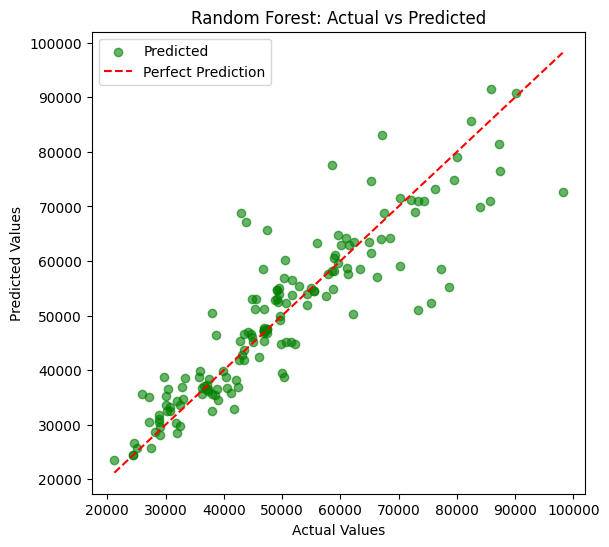

In [46]:
import matplotlib.pyplot as plt


# Drawing plot for Random Forest
plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_preds, alpha=0.6, color='green', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Actual vs Predicted")
plt.legend()




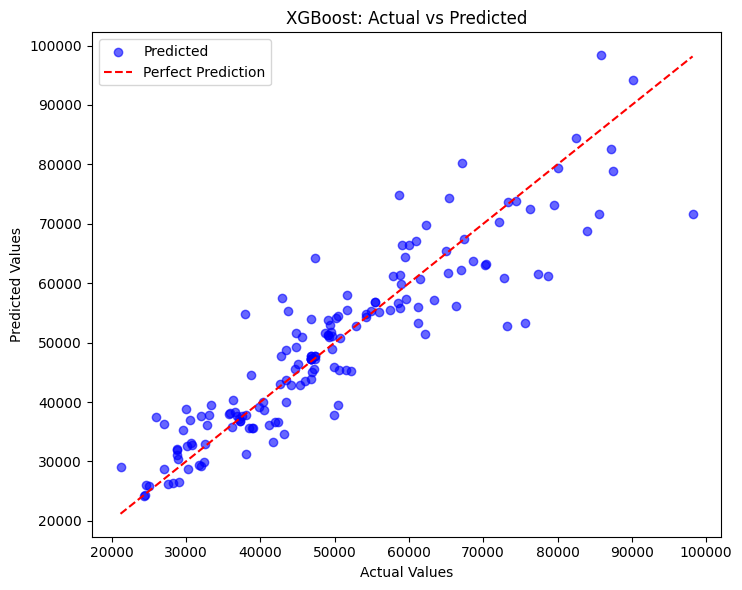

In [45]:
# Drawing plot for XGBoost
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 2)
plt.scatter(y_test, xgb_preds, alpha=0.6, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("XGBoost: Actual vs Predicted")
plt.legend()

plt.tight_layout()
plt.show()